In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import descartes

%matplotlib inline

In [34]:
train_df = pd.read_csv('./kaggle_data/train.csv')
weather_df = pd.read_csv('./kaggle_data/weather.csv')
spray_df = pd.read_csv('./kaggle_data/spray.csv')

In [35]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [36]:
geometry = [Point(xy) for xy in zip(spray_df.Longitude, spray_df.Latitude)]

In [37]:
spray_df['geometry'] = geometry

In [38]:
spray_df.drop(['Latitude','Longitude'], axis = 1, inplace=True)

In [39]:
crs = {'init': 'epsg:4326'}
spray_locs = gpd.GeoDataFrame(spray_df, crs=crs, geometry=geometry)

In [40]:
spray_locs.head()

,Date,Time,geometry
0,2011-08-29,6:56:58 PM,POINT (-88.0891633333333 42.3916233333333)
1,2011-08-29,6:57:08 PM,POINT (-88.0891633333333 42.3913483333333)
2,2011-08-29,6:57:18 PM,POINT (-88.0891566666667 42.3910216666667)
3,2011-08-29,6:57:28 PM,POINT (-88.0891583333333 42.3906366666667)
4,2011-08-29,6:57:38 PM,POINT (-88.08885833333331 42.39041)


In [41]:
city_bound = gpd.read_file("/home/ryan/Downloads/geo_export_f811cd49-e795-4f00-aa95-f503907fcf43.shp")

RangeIndex(start=0, stop=10506, step=1)

In [43]:
train_geo = [Point(xy) for xy in zip(train_df.Longitude, train_df.Latitude)]

In [44]:
train_df['location'] = train_geo

In [45]:
train_df.drop(['Latitude','Longitude'], axis = 1, inplace=True)

In [46]:
mosquito_locs = gpd.GeoDataFrame(train_df, crs=crs, geometry=train_geo)

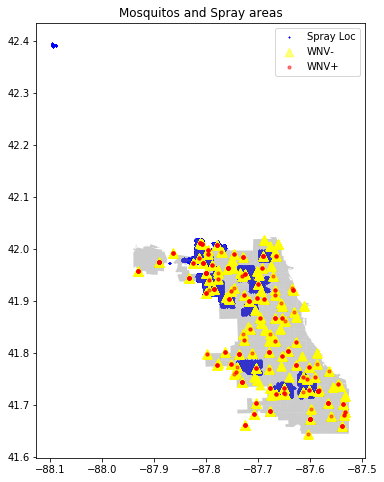

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
spray_locs.geometry.plot(marker='x', color='blue', markersize=1, ax=ax, label = 'Spray Loc')
city_bound.plot(color='grey', ax=ax, alpha = 0.4)
mosquito_locs[mosquito_locs['WnvPresent']==0].geometry.plot(marker='^', color = 'yellow', ax = ax, label = 'WNV-', alpha=.5, markersize = 75 )
mosquito_locs[mosquito_locs['WnvPresent']==1].geometry.plot(marker='o', color = 'red', ax = ax, label = 'WNV+', alpha = .5, markersize = 10)
# at first glance, it looks as though WNV- mosquitos were found alongside WNV+ mosquitos everytime a WNV+ mosquito was found
    #however, there are lots of instances where WNV- mosquitos were found with WNV+ mosquitos


plt.title('Mosquitos and Spray areas')
plt.legend()

In [48]:
#need to remove outlier data on plot, would be good if we can drop all data that is outside of the city lines